# Cart-Pole Plots

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import json

## Policy Gradient (GPOMDP)

In [2]:
# open file
# path = "/Users/ale/results/pg/pg_test_gpomdp"
# path = "/Users/ale/results/pg/pg_test_gpomdp_adasigma"
path = "/Users/ale/results/pg/pg_test_gpomdp_adasigma_adam"
# path = "/Users/ale/results/pg/pg_test_reinforce" 
name = path + "/pg_results.json"
file = open(name)
data = json.load(file)

In [3]:
# extract data
ite = len(data["performance"])
x = np.arange(ite)
best_idx = np.where(np.array(data["performance"]) == data["best_perf"])[0]
dim = len(data["thetas_history"][0])
best_theta_idx = []
for i in range(dim):
    best_theta_idx.append(np.where(np.array(data["thetas_history"])[:, i] == data["best_theta"][i]))
best_theta_idx = np.ravel(np.array(best_theta_idx))

<Figure size 640x480 with 0 Axes>

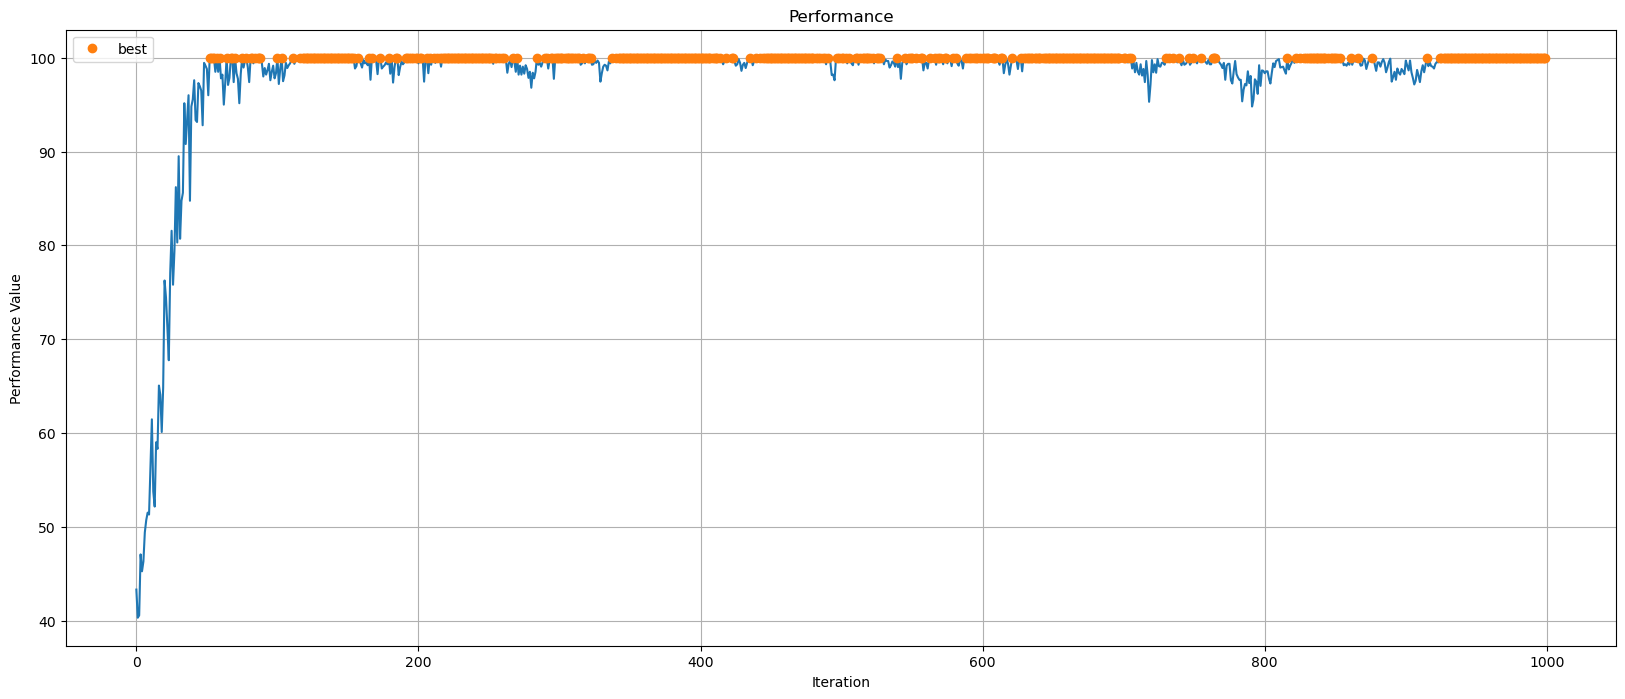

In [4]:
# Performance plot
plt.clf()
plt.figure(figsize=(20, 8))
plt.plot(x, data["performance"])
plt.plot(best_idx, data["best_perf"] * np.ones(len(best_idx)), "o", label="best")
plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

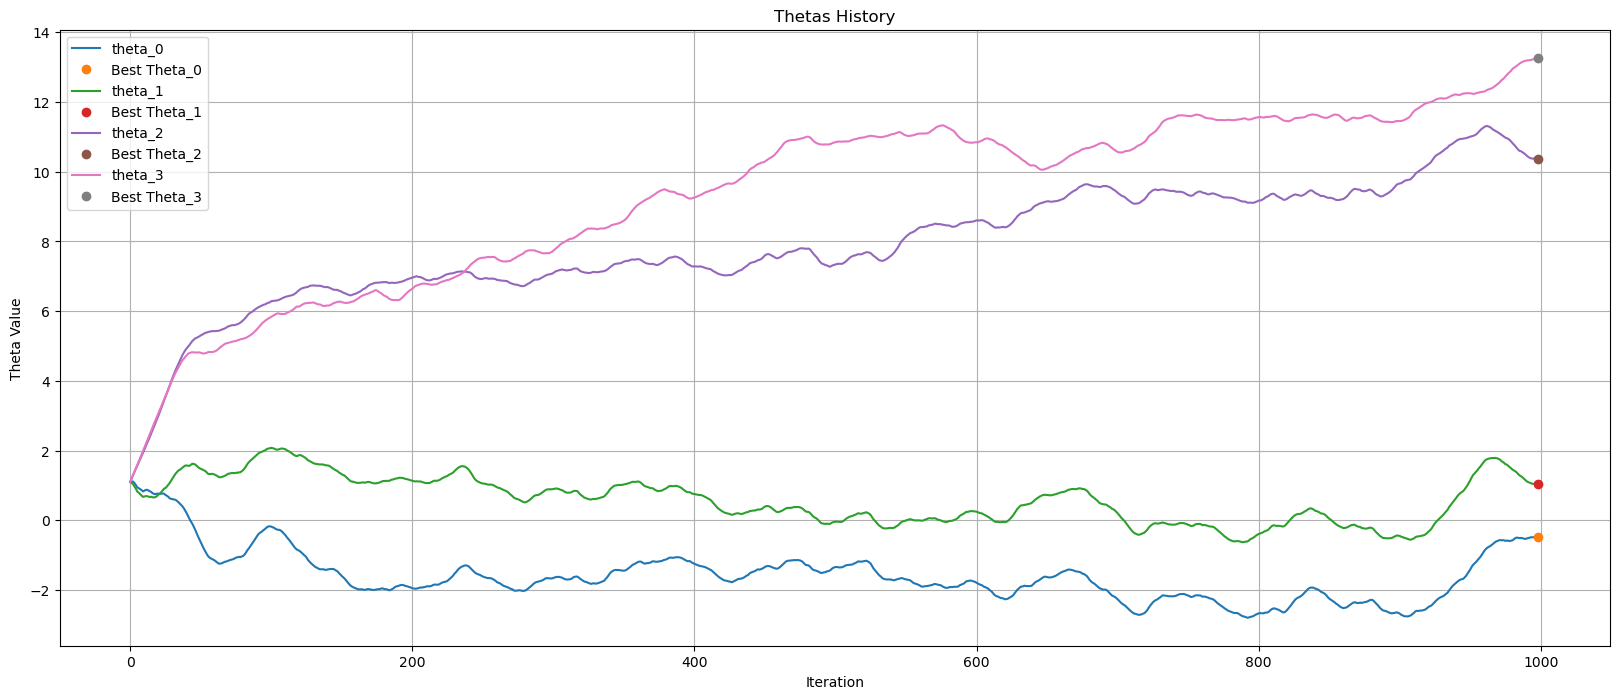

In [5]:
# theta plot
plt.clf()
plt.figure(figsize=(20, 8))
for i in range(dim):
    plt.plot(x, np.array(data["thetas_history"])[:, i], label=f"theta_{i}")
    plt.plot(best_theta_idx[i], data["best_theta"][i],"o", label=f"Best Theta_{i}")
plt.title("Thetas History")
plt.xlabel("Iteration")
plt.ylabel("Theta Value")
plt.legend(loc="best")
plt.grid()
plt.show()

---

## Parameter Exploring Policy Gradient

In [25]:
# open file
# path = "/Users/ale/results/pgpe/pgpe_test_cartpole"
path = "/Users/ale/results/pgpe/pgpe_test_cartpole_adam"
name = path + "/pgpe_results.json"
file = open(name)
data = json.load(file)

In [26]:
data.keys()

dict_keys(['performance_rho', 'performance_thetas_per_rho', 'best_theta', 'best_rho', 'thetas_history', 'rho_history'])

In [27]:
perf_rho = np.array(data["performance_rho"])
perf_thetas = np.array(data["performance_thetas_per_rho"])
best_theta = np.array(data["best_theta"])
best_rho = np.array(data["best_rho"])
thetas_history = np.array(data["thetas_history"])
rho_history = np.array(data["rho_history"])

dim = len(best_rho[0])
ite = len(perf_rho)
x = np.arange(ite)

<Figure size 640x480 with 0 Axes>

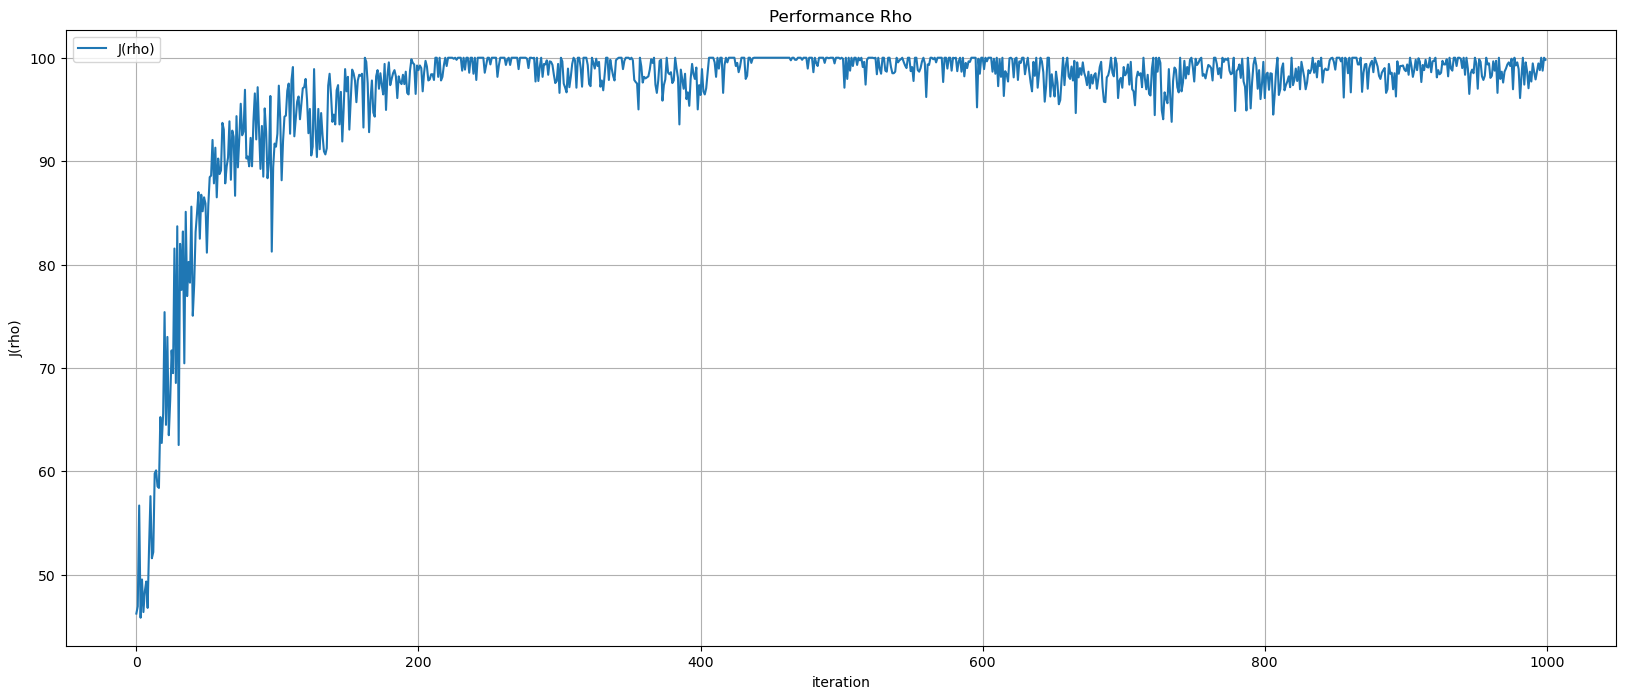

In [28]:
plt.clf()
plt.figure(figsize=(20, 8))
plt.plot(x, perf_rho, label="J(rho)")
plt.title("Performance Rho")
plt.xlabel("iteration")
plt.ylabel("J(rho)")
plt.grid()
plt.legend(loc='best')
plt.show()

<Figure size 640x480 with 0 Axes>

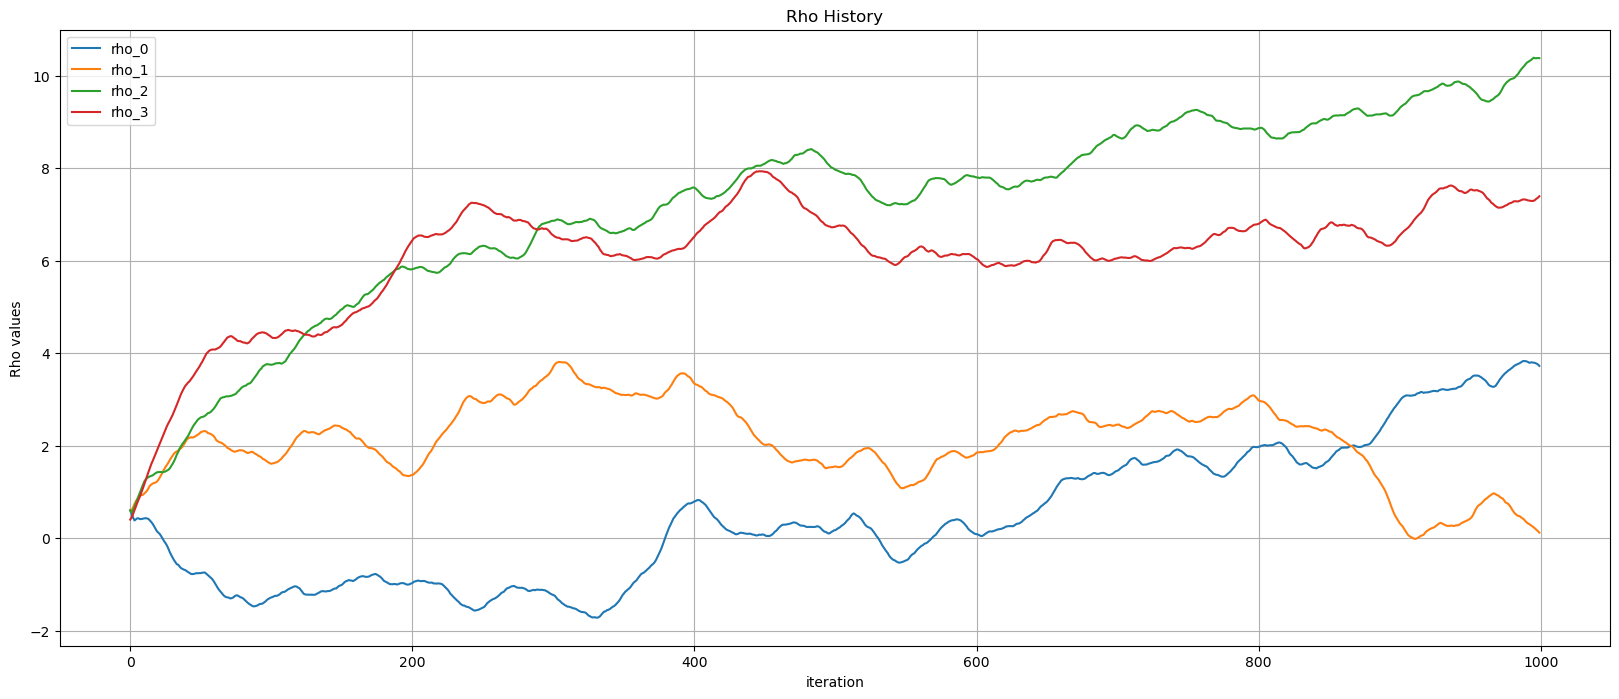

In [29]:
plt.clf()
plt.figure(figsize=(20, 8))
for i in range(dim):
    plt.plot(x, rho_history[:, i], label=f"rho_{i}")
plt.title("Rho History")
plt.xlabel("iteration")
plt.ylabel("Rho values")
plt.grid()
plt.legend(loc='best')
plt.show()